# INFO 2950 Homework 3

So far, we've been looking within one variable at a time: population, avocado price, etc. In this homework, we're going to start looking at ways of quantifying the relationship *between* two variables.

**No problem in this homework will involve `for` loops. Use only methods that operate on pandas DataFrames or Series.** (Series are one-dimensional arrays and often how DataFrame columns are represented when extracted.) These custom methods are written to operate efficiently on pandas objects, and are generally more computationally efficient than `for` loops.

## Part 1: Discussion exercises

### Python Functions

A Python function is a set of pre-defined code written for a specific purpose. To decrease code repetition (especially copying and pasting, which can introduce unwanted bugs), we write functions to perform repeated tasks. You can input data (usually called "arguments" or "parameters") into a function. A function will perform its internal code and can (optionally) output objects using a `return` statement. A function will only execute when it's explicitly called. Indents in the function definiton are essential.

Here is an example of a simple function that prints the variable passed in as the first (and only) parameter (called `my_string` locally, within the function definition).

In [1]:
def print_something(my_string):
    '''
    param my_string: a string parameter. This is what you want to print
    '''
    print(my_string)
    
print_something('Homework 3')    

Homework 3


While this function prints a statement, it doesn't actually return anything:

In [2]:
print('type returned: ' + str(type(print_something('test'))))

test
type returned: <class 'NoneType'>


The comment (between the `'''` symbols) in the function defintion is called a **docstring**. The docstring should tell the user what the function does, which parameters the function takes in, and what the function returns. In this case, it tells us what the parameter `my_string` should be. The way that this comment is formatted can also automatically generate documentation for your functions. 

It is very important to document any code you bother spending time to convert to a function, because you may want to use it again or share your code with others. It's helpful to write notes about how the function can be used and what it does.

Here is another function: this one takes *two* arguments and actually returns an object, all of which is documented in the comment at the top of the function definition. 

In [3]:
def get_course(dept, classcode):
    '''
    param dept: a string. It's the department code. 
    param classcode: an integer. It's the course number
    return: a string value which combines both department code and course number
    '''
    return dept + str(classcode)

output = get_course('INFO', 2950)
print(output)
print('Type of the Returned Object: ' + str(type(output)))

INFO2950
Type of the Returned Object: <class 'str'>


It's common to begin your function names with a verb (like "get" or "print" in the above examples). This helps differentiate your function from an object, and helps prevent you accidentally applying the same name to a function and an object.

### String formatting

We often want to construct and print strings that include the values of calculated variables; it's good practice to add context to any values you print in your notebooks, so others reading them know what the number you're printing is. For instance, it's clearer to print `Mean Price: $27.80` instead of just `27.8`.
    
You can concatenate strings with the `+` operator, but you can only concatenate objects of the same type (they have to both be strings). Otherwise, you have to convert the non-string object into a string (like we did above with `str(type(output))`). Sometimes there are multiple ways to display a variable, such as a float with either 2 or 3 decimal places. All strings have a method, `.format()`, that allows you to construct strings with placeholders where variables get inserted and to specify how the variables should appear.

We start by creating a string *template*. We insert placeholders `{}` into the string template where we want variable values to appear. Then for each of these placeholders, we include the corresponding variable as an argument to `.format()` (in the desired order of appearance in the string template). For each of these values, Python will convert the value to a string and insert it in the corresponding placeholder. You can also specify how you want a value to appear. To format a value as a 4-digit decimal integer with leading zeros, use `{:04d}`. To round a float to two decimal places, use `{:.2f}`. See [the documentation](https://docs.python.org/3.8/library/string.html#formatspec) for other options.

Python also supports an older string format style using the `%` operator, which we prefer you do *not* use. There is also a newer method called f-strings that you may use. You may be familiar with `.format()` in the context of `print()` statements, but it's really a function of strings, not printing strings.

In [4]:
'This is my {} string.'.format('favorite')

'This is my favorite string.'

In [5]:
'The letter {} has Unicode codepoint {:d} (as an integer), which is {:x} in hexadecimal and {:08b} in binary'.format('M', ord('M'), ord('M'), ord('M'))

'The letter M has Unicode codepoint 77 (as an integer), which is 4d in hexadecimal and 01001101 in binary'

### Correlation and Causation

We often want to measure the relationship between two variables because we want to know whether the value of one variable *causes* another variable to have a certain value. Usually this is interesting because there may be one variable we care about but cannot directly control, and another variable that we can control, but we don't necessarily care about in and of itself. For example, I don't care about the number on my thermostat for itself, I care about it because changing that number has a causal effect on the actual temperature in the house.

**1. Describe a situation where one variable, which we can observe and control, influences the value of another variable. Without using specific quantitative measurements, describe how strong you consider this relationship to be.**

**2. Describe a situation where one variable does not *influence* another variable, but nevertheless allows you to *predict* the value of that second variable. What would you need to do to distinguish between this situation and the previous situation?**

Correlation does not necessarily imply causation. Most of the statistical methods we will study can only show correlation, though there exist careful experimental designs that can enable [causal inference](https://en.wikipedia.org/wiki/Causal_inference). 

### Beyond Correlation/Causation

You may be familiar with the previous discussion. In fact, mean, variance, and "correlation is not causation" is about the only thing that we can reliably assume that everyone learns in a statistics class. But there's another problem that we face, which can be subtler and more dangerous.

Consider a system that predicts creditworthiness. The rows in the data table will correspond to people, and it is extremely easy to think of what you are doing as classifying *people* as creditworthy or not. But, as Princeton sociologist Ruha Benjamin [has pointed out](https://www.goodreads.com/en/book/show/42527493-race-after-technology), almost all of the actual variables are describing a person's *situation*. Sometimes situations can change quickly, as we all saw this year, and sometimes they can be nearly impossible to escape. 

**3. The dataset we will look at in this homework is about the educational achievements of kindergarterners. It includes demographic information, as you can see from the data description file (**`Data description ECLS_R7.pdf`**). What do you think that you should be able to say about these children based on these measurements, and what can you not say?**


---

## Problem 1 (9 pts)

Write down your thoughts about the three discussion questions. Ensure your answer is moderately detailed to get full marks.

---

1) If you are the owner of a shop then you can control the price of an item and this will most likely increase the sales number of a number.

2) Ice cream sales increase and so do shark attacks at the same time in the summer. 

3) Due to the sensitive nature of working with children, it might be unethical to measure the performance of a child compared to the depressive symptoms of a parent. 

## Part 2: Correlation and Covariance
We will investigate data collected as part of the Early Childhood Longitudinal Studies program, which seeks to understand childhood development from birth through elementary school in the United States. The main dataset we will work with quantifies [the development of kindergarteners in 2010-2011](https://nces.ed.gov/ecls/kindergarten2011.asp) and is provided as `ECLS_R7.csv`. You may find it helpful to refer to the data description file (also sometimes referred to as a "codebook"), `Data description ECLS_R7.pdf`, which defines the variables in the data. While there is a lot of of information in this file, we will only explore a few variables in this homework.

**Hint:** Remember to download all of the data files from CMS and to put them in the same directory as this notebook! If you get errors trying to load the files, it's likely that either you haven't downloaded them or haven't put them in the correct location.

In [6]:
# Load all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load the provided data
education_data = pd.read_csv('ECLS_R7.csv')

---

## Problem 2 (4 pts)
What does the variable `X7STHETK4` measure? Consult the dataset documentation in the "Data Description" file to find the answer. Write your answer in a new markdown cell below.

Then, calculate and print the mean and median of this variable. **In this and all of the following problems, make sure to round all printed floats to two decimal places and provide context in the printed output for what each number represents.**

**Hint:** We will use the columns `X7MTHETK4`, `X7STHETK4`, `X7RTHETK4`, `EXTRACUR` throughout this homework. You may find it helpful to rename these columns now (e.g. using the [`.rename()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html) dataframe method).

---

It measures the sciecne score.

In [7]:
education_data.rename( columns = {'X7MTHETK4': 'math_score', "X7STHETK4": "science_score", \
"X7RTHETK4" : "reading_score", "EXTRACUR": "extras"}, inplace = True)

print(f"The science score mean is {education_data.science_score.mean(): .2f}")
print(f"The science score median is {education_data.science_score.median(): .2f}")

The science score mean is  2.29
The science score median is  2.42


---

## Problem 3 (4 pts)

Calculate and print the 1st quartile and the 95th precentile of the reading score (original column name: `X7RTHETK4`) using the [.quantile()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.quantile.html) Series method. How are quartiles and percentiles related? Explain in text.


**Hint:** What are ["quantiles", "quartiles", and "percentiles"](https://www.statsdirect.com/help/nonparametric_methods/quantiles.htm#:~:text=Quantiles%20are%20points%20in%20a,of%20values%20in%20that%20distribution.&text=Centiles%2Fpercentiles%20are%20descriptions%20of,sorted%20values%20of%20a%20sample)?

---

In [8]:
first_quartile = round(education_data.reading_score.quantile(q=0.25), 2)
print(f"The first quartile for the reading data is {first_quartile}")
nintyfith_percentile = round(education_data.reading_score.quantile(q=0.95), 2)
print(f"The 95th percentile is {nintyfith_percentile}.")


The first quartile for the reading data is 2.28
The 95th percentile is 3.69.


---
## Problem 4 (2 pts)

Calculate and print the mean and standard deviation of the students' math scores (original column name: `X7MTHETK4`). Save these two values to Python variables (you will find these variables useful in the next problem).

In [9]:
math_score_mean = round(education_data.math_score.mean(),2)
math_score_std = round(education_data.math_score.std(),2)
print(f"The mean math score is {math_score_mean}.")
print(f"The standard deviation for math scores is {math_score_std}")

The mean math score is 3.16.
The standard deviation for math scores is 0.73


---

## Problem 5 (10 pts)

Suppose we want to count the number of observations when a variable is in a given range. Write a [Python function](https://www.w3schools.com/python/python_functions.asp) called `count_within_range(sub_dataframe, lower, upper)` that takes three arguments: the subset data for calculation (as a Pandas Series), and the lower and upper bounds (as numbers).

In the body of your function:
1. Use the [`.between()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.between.html) subsetting method to select the observations in the given range
2. Calculate and print the **minimum** and **maximum** values of the range, **the count of observations** within the range, and **the percentage (%) of all observations** that are found in the range.

The function should not return anything. Be sure to label each printed number and use [`.format()`](https://mkaz.blog/code/python-string-format-cookbook/) to round all printed floats to two decimal places (integers should have zero decimal places). 

Call this function for the math score values with the following ranges:

* *one standard deviation below the mean* to *the mean*
* *the mean* to *one standard deviation above the mean*

Based on these results, do you think the distribution of this variable is *symmetric* (the same on both ends of the distribution)? In other words, is the distribution skewed? Explain.

---

In [10]:
def count_within_range(sub_dataframe, lower, upper):
    between_data = sub_dataframe.loc[sub_dataframe.between(lower, upper, inclusive = True)]
    minimum = between_data.min()
    print(f"The minimum value is {minimum:.2f}")
    maximum = between_data.max()
    print(f"The maximum value is {maximum:.2f}")
    count = between_data.count()
    print(f"The number of values is {count}")
    percentage = count/len(sub_dataframe) * 100
    print(f"The percentage of values in this subset is {percentage:.2f}% \n")

count_within_range(education_data["math_score"], (math_score_mean - math_score_std),(math_score_mean))

count_within_range(education_data["math_score"], (math_score_mean),(math_score_mean + math_score_std))  

The minimum value is 2.43
The maximum value is 3.16
The number of values is 1289
The percentage of values in this subset is 28.28% 

The minimum value is 3.16
The maximum value is 3.89
The number of values is 1834
The percentage of values in this subset is 40.24% 



---

## Problem 6 (4 pts)

Make a scatter plot [with matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) to show the distribution of data points in two dimensions (using two variables): math score on the x-axis and and reading score on the y-axis. 

Set the parameter `alpha` as 0.3 in `.scatter()` to control the marker opacity, and set the axis labels as *Math Score* and *Reading Score*.

Describe the trend in the relationship between these two variables, as revealed by the scatterplot.

---

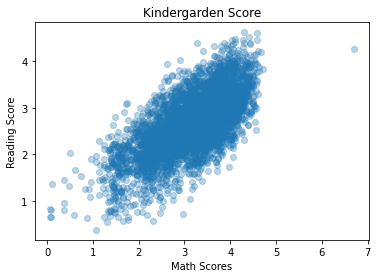

In [11]:
plt.scatter(education_data.math_score, education_data.reading_score, alpha = .3)
plt.xlabel('Math Scores')
plt.ylabel('Reading Score')
plt.title("Kindergarden Score")
plt.show()

---

## Problem 7 (6 pts)

Measure the strength of the association observed in the scatterplot from the previous problem by calculating and printing the **covariance** and Pearson **correlation** between the math and reading scores. Use the [`.cov()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.cov.html) and [`.corr()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.corr.html) pandas Series methods.

After printing the covariance and correlation for the original data, create two new Series:
* `math_times_ten` = the math score column multiplied by 10
* `reading_times_ten` = the reading score column multiplied by 10

Calculate and print the covariance and correlation between these two new series and describe the effect of scaling the original data by 10 on the covariance and correlation.

---

In [12]:
original_covariance  = education_data["math_score"].cov(education_data["reading_score"])

original_correlation = education_data["math_score"].corr(education_data["reading_score"])

math_times_ten = education_data["math_score"] * 10

reading_times_ten = education_data["reading_score"] * 10

new_covariance = math_times_ten.cov(reading_times_ten)

new_correlation = math_times_ten.corr(reading_times_ten)

print(f"The covariance is {original_covariance: .2f}")
print(f"The correlation is {original_correlation: .2f}")

print(f"The covariance after multiplying 10 is {new_covariance: .2f}")
print(f"The correlation after multiplying 10 is {new_correlation: .2f}")

The covariance is  0.32
The correlation is  0.69
The covariance after multiplying 10 is  32.15
The correlation after multiplying 10 is  0.69


---

## Problem 8 (6 pts)

Calculate and print the mean and standard deviation of the science and reading scores. Save these values to Python variables.

Next, select the students whose **science score** is between its mean and one standard deviation above the mean. Calculate and print the mean and the standard deviation of the **reading scores** for this subset of students.

For the reading scores, how do the mean and standard deviation change when we go from looking at all students in the dataset to just those with a science score within one standard deviation above its mean? How does your observation relate to the correlation score between these two variables?

---

In [13]:
science_score_mean = round(education_data.science_score.mean(),2)
science_score_std = round(education_data.science_score.std(), 2)
reading_score_mean = round(education_data.reading_score.mean(),2)
reading_score_std = round(education_data.reading_score.std(),2)

print(f"The mean science score is {science_score_mean} the standard deviation is \
{science_score_std}")
print(f"The mean reading score is {reading_score_mean} the standard deviation \
is {reading_score_std}.")

science_score_conditional = (education_data.science_score > science_score_mean)\
& (education_data.science_score < (science_score_mean + science_score_std))

science_score_between = education_data.science_score.loc[science_score_conditional]

science_score_between_mean = round(science_score_between.mean(),2)
science_score_between_std = round(science_score_between.std(),2)

print(f"The new mean for the sciecne score is {science_score_between_mean} \
the new standard deviation is {science_score_between_std}.") 

The mean science score is 2.29 the standard deviation is 0.75
The mean reading score is 2.69 the standard deviation is 0.64.
The new mean for the sciecne score is 2.65 the new standard deviation is 0.21.


---

## Problem 9 (9 pts)

a) Group the data by school (indicated in the ID column `'S7_ID'`) and calculate the mean science and reading scores for each school. 

b) Then, subset the data, keeping only schools whose mean science *and* reading scores are both strictly greater than 2. Save this dataframe as a variable called `school_mean_subset`. Print the number of rows in `school_mean_subset`.

**Hint:** When subsetting the mean science and reading scores by school to satisfy two conditions, there are [several ways to accomplish this task](https://kanoki.org/2020/01/21/pandas-dataframe-filter-with-multiple-conditions/). Pick your favorite. And [`.reset_index()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html) is a method you may need if you want to reset the index column of a groupby result.

c) Calculate and print the Pearson correlation and the Spearman (rank) correlation between the science and reading scores in the subset data. The [`.corr()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.corr.html) computes the Pearson correlation by default, but you can get the Spearman correlation by explicitly specifying the `method` parameter (check the documetation linked above).

d) Make a scatterplot with the average science scores on the x-axis, and the average reading scores on the y-axis. Discuss any patterns you see in the scatterplot, and connect your observations to the two correlation scores.

---

The number of rows in this subsetted data frame is 720
The pearsonn correlation is 0.665 and the spearman correlation is 0.66


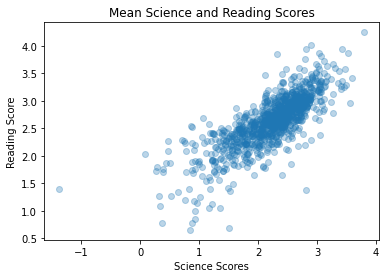

Here we can see that there is a strong positive correlation between the average science scores and average reading scores. This makes sense, since at a young age sciecne education is mostly reading comprehension.


In [14]:
grouped_by_school = education_data.groupby(["S7_ID"])

mean_by_school_sci_read = grouped_by_school[["science_score", "reading_score"]].mean()

school_mean_subset = mean_by_school_sci_read.loc[(mean_by_school_sci_read.science_score > 2) & \
(mean_by_school_sci_read.reading_score > 2)]

print(f"The number of rows in this subsetted data frame is {len(school_mean_subset)}")

pearson = round(school_mean_subset.corr(),3)
spearman = round(school_mean_subset.corr(method = "spearman"),3)



print(f"The pearsonn correlation is {pearson.iloc[0,1]} and \
the spearman correlation is {spearman.iloc[0,1]}")



plt.scatter(mean_by_school_sci_read.iloc[:,0], mean_by_school_sci_read.iloc[:,1], alpha = .3)
plt.xlabel('Science Scores')
plt.ylabel('Reading Score')
plt.title("Mean Science and Reading Scores")
plt.show()


print("Here we can see that there is a strong positive correlation between the average science scores\
 and average reading scores. This makes sense, since at a young age sciecne education is mostly reading\
 comprehension.")

---

## Problem 10 (8 pts)

a) Use the [`.rank()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rank.html) Series method to add new columns called `'science_rank'` and `'reading_rank'` to `school_mean_subset`. These columns should contain the rank of the mean science and reading scores (by school), respectively. Print the first few rows of these new columns. Print the series for school `S7_ID == 1022`.

b) Calculate the Pearson and Spearman correlation between the two new columns (`science_rank` and `reading_rank`) and make a scatterplot with `science_rank` on the x-axis and `reading_rank` on the y-axis.

c) In your own words, compare the correlations computed in this problem with those computed in the previous problem.

---

       science_score  reading_score  sciecne_rank  reading_rank
S7_ID                                                          
1002        2.879183       3.024133         925.0         832.0
1003        2.429033       2.622850         605.0         463.0
1013        2.164500       2.665182         389.0         505.0
1014        2.123000       2.920860         360.0         741.0
1015        2.312840       2.787440         507.0         625.0

 The pearson corraltion is  0.65 and the spearman correlation is 0.66


<ipython-input-15-826ecaf318e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_mean_subset["sciecne_rank"] = mean_by_school_sci_read.iloc[:,0].rank();
<ipython-input-15-826ecaf318e1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_mean_subset["reading_rank"] = mean_by_school_sci_read.iloc[:,1].rank();


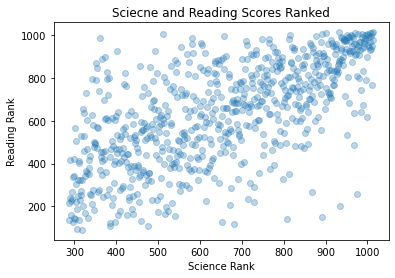

According to my calculations the pearson correlations were approximatly equal for both problems. This would indicate that both variables are approximaelty equally dependent on one another.


In [15]:
#(A)
school_mean_subset["sciecne_rank"] = mean_by_school_sci_read.iloc[:,0].rank();
school_mean_subset["reading_rank"] = mean_by_school_sci_read.iloc[:,1].rank();
print(school_mean_subset.head(5));

#school_mean_subset.loc[school_mean_subset["reading_rank"]  == 1022]

#(B)
pearson_correlaton = school_mean_subset["sciecne_rank"].corr(school_mean_subset["reading_rank"])
spearman_correlation = school_mean_subset["sciecne_rank"].corr(school_mean_subset["reading_rank"],\
                                                              method='spearman')
print(f"\n The pearson corraltion is {pearson_correlaton: .2f} and the spearman correlation is\
 {spearman_correlation:.2f}")

plt.scatter(school_mean_subset["sciecne_rank"], school_mean_subset["reading_rank"], alpha = .3)
plt.xlabel('Science Rank')
plt.ylabel('Reading Rank')
plt.title("Sciecne and Reading Scores Ranked")
plt.show()

#(C)
print("According to my calculations the pearson correlations were approximatly equal for both problems.\
 This would indicate that both variables are approximaelty equally dependent on one another.")



---

## Problem 11 (8 pts) 

a) `EXTRACUR` represents whether or not the student is enrolled in after school activities. Calucate the mean score of math, science, reading score, then compare the difference between scores according the `EXTRACUR` by making a boxplot. n the boxplot, put the mean scores on the y-axis and the `EXTRACUR`  on the x-axis. Discuss any patterns you see in the boxplot.

b) [A **t-test** is a statistical test that is used to compare the means of two groups](https://www.statisticshowto.com/probability-and-statistics/t-test/). The t-test tells you whether the differences between groups are **significant**. It has been used widely in hypothesis testing to determine whether a process or treatment actually has an effect on the population of interest, or whether two groups are different from one another. Every t-value has a **p-value** to go with it. A p-value is the probability that the results from your sample data occurred by chance. P-values are from 0% to 100%. They are usually written as a decimal. For example, a p-value of 5% is 0.05. **Low p-values are good**; they indicate your data did not occur by chance. 

Create a subset of the data so that the `EXTRACUR` values are equal to or above 3. Do the same for `EXTRACUR` values  that are strictly less than 3. Use the `stats.ttest_ind()` function to compare the subsets; print the results of this test (the t-statistic and the p-value). When calling this function, set the argument `equal_var=False`. Check [the documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) of this function if you have questions.

Describe and explain your results.

---

In [61]:

grouped_data = education_data.groupby(education_data["extras"]).mean()
grouped_data_means = grouped_data[["science_score", "reading_score", "math_score"]]


#(B)

above_three = education_data["extras"].loc[(education_data["extras"] >= 3)]
below_three = education_data["extras"].loc[(education_data["extras"] < 3)]
print(stats.ttest_ind(above_three, below_three, equal_var=False))

print("\nNote that the pvalue is zero due to my rounding of values ealrier in the notebook.\
 This sugests that the two variables are similiar.")

Ttest_indResult(statistic=91.71226860046222, pvalue=0.0)

Note that the pvalue is zero due to my rounding of values ealrier in the notebook. This sugests that the two variables are similiar.


In [83]:
education_data.math_score[ (education_data.math_score > 3) & (education_data.math_score == 3)] 

Series([], Name: math_score, dtype: float64)